In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import tensorflow as tf
from keras import backend as K
from keras.layers import Activation
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
img=pd.read_csv('data/HAM10000/hmnist_28_28_RGB.csv')

In [3]:
img.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
img.shape

(10015, 2353)

In [5]:
skin_df=pd.read_csv('data/HAM10000/HAM10000_metadata.csv')

In [6]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [7]:
skin_df.shape

(10015, 7)

In [8]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [10]:
skin_df['age']=skin_df['age'].fillna(skin_df['age'].mean( ))

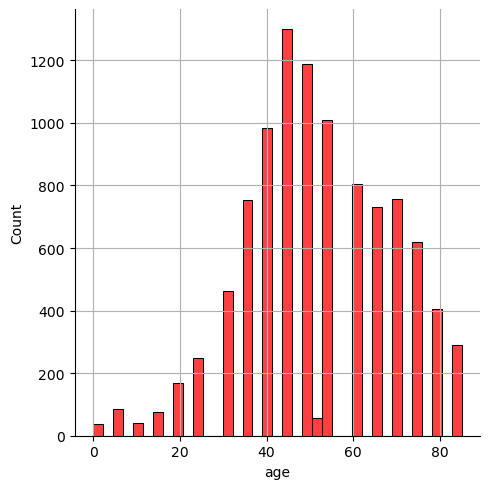

In [11]:
sns.displot(skin_df['age'],color='red')
plt.savefig('age_dist')
plt.grid()

In [14]:
skin_df=skin_df[skin_df['sex']!= 'unknown']
skin_df=skin_df[skin_df['localization']!='unknown']

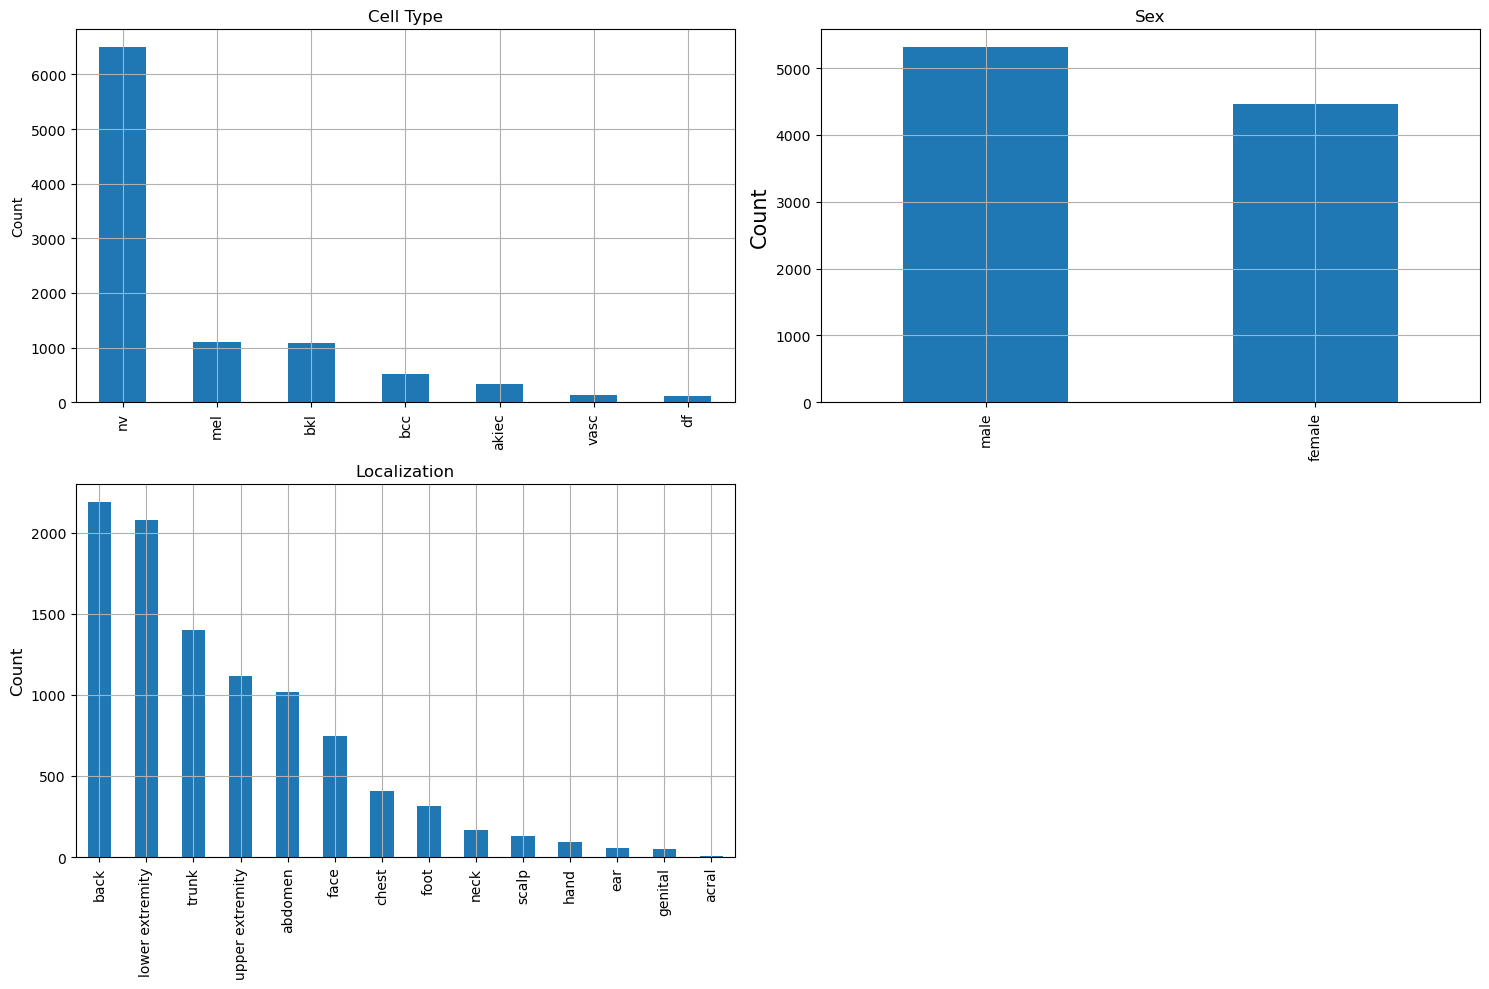

In [15]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');
plt.grid()

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');
plt.grid()


ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

plt.grid()
plt.tight_layout()
plt.savefig('value_count')
plt.show()

In [10]:
main=pd.concat([skin_df,img],axis=1)

In [11]:
main.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,pixel0000,pixel0001,pixel0002,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,192,153,193,...,173,124,138,183,147,166,185,154,177,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,25,14,30,...,60,39,55,25,14,28,25,14,27,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,192,138,153,...,167,129,143,159,124,142,136,104,117,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,38,19,30,...,44,26,36,25,12,17,25,12,15,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,158,113,139,...,209,166,185,172,135,149,109,78,92,2


In [12]:
main.shape

(10015, 2360)

In [13]:
X=main.drop(['lesion_id','image_id','dx','dx_type','age','sex','label','localization'],axis=1)
y=main['label']

In [14]:
print(X.shape)
print(y.shape)

(10015, 2352)
(10015,)


In [15]:
X.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


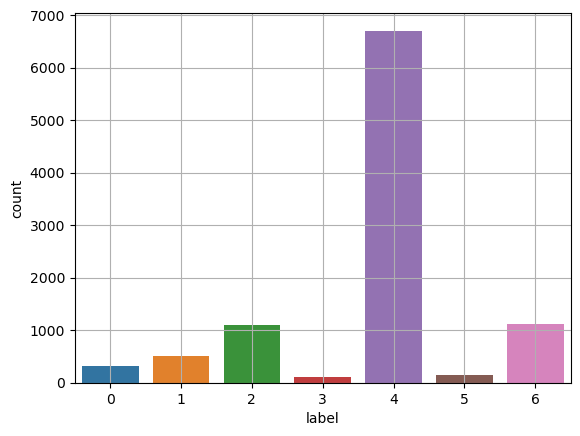

In [16]:
sns.countplot(x=y)
plt.grid()
plt.savefig('sample')

In [17]:
spr=RandomOverSampler()
X,y=spr.fit_resample(X,y)

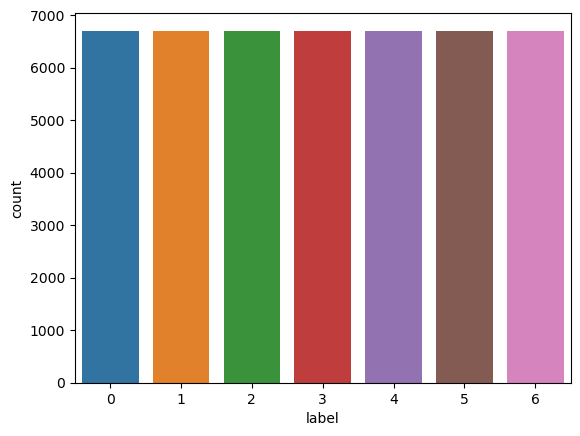

In [18]:
sns.countplot(x=y)
plt.savefig('resample')

In [19]:
print(X.shape)
print(y.shape)

(46935, 2352)
(46935,)


In [20]:
X=np.array(X).reshape(-1,28,28,3)
X=X/255

In [21]:
X.shape

(46935, 28, 28, 3)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(37548, 28, 28, 3)
(37548,)
(9387, 28, 28, 3)
(9387,)


In [24]:
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [25]:
model=Sequential()
model.add(Conv2D(32,(2,2),activation='mish',input_shape=(28,28,3)))
model.add(MaxPool2D(pool_size=(2,2)))

In [26]:
model.add(Conv2D(32,(2,2),activation='mish'))
model.add(MaxPool2D(pool_size=(2,2)))

In [27]:
model.add(Conv2D(64,(2,2),activation='mish'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))

In [28]:
model.add(Dense(64,activation='mish'))
model.add(Dense(7,activation='softmax'))

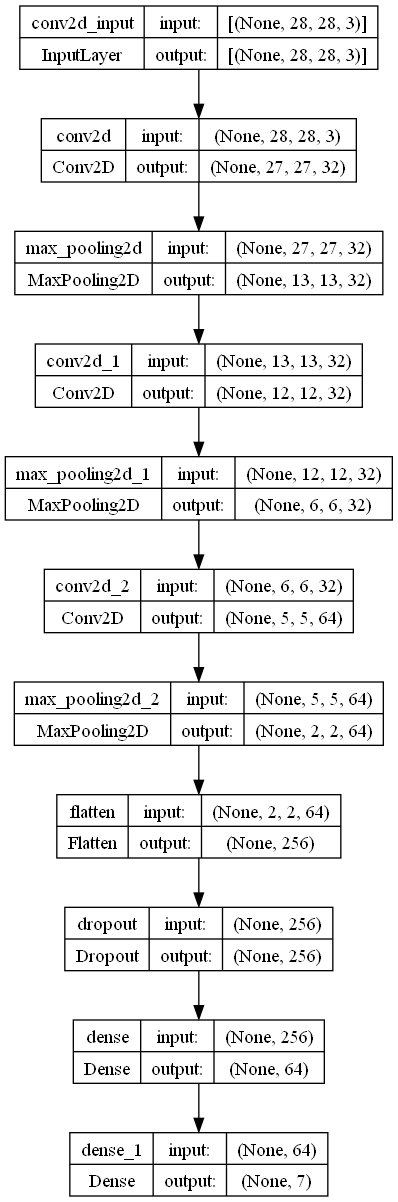

In [31]:
keras.utils.plot_model(model,'model_f.png',show_shapes=True)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

In [30]:
callback=tf.keras.callbacks.ModelCheckpoint(filepath='best_model_c1.keras',
                                           monitor='val_acc',mode='max',verbose=1)
early_stopping=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [31]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=[X_test,Y_test],callbacks=[callback,early_stopping])

Epoch 1/100
1173/1174 [============================>.] - ETA: 0s - loss: 1.3487 - accuracy: 0.4701
Epoch 1: saving model to best_model_c1.keras
1174/1174 [==============================] - 65s 51ms/step - loss: 1.3485 - accuracy: 0.4701 - val_loss: 1.0323 - val_accuracy: 0.6036
Epoch 2/100
1174/1174 [==============================] - ETA: 0s - loss: 1.0286 - accuracy: 0.6041
Epoch 2: saving model to best_model_c1.keras
1174/1174 [==============================] - 57s 49ms/step - loss: 1.0286 - accuracy: 0.6041 - val_loss: 0.8869 - val_accuracy: 0.6604
Epoch 3/100
1173/1174 [============================>.] - ETA: 0s - loss: 0.9055 - accuracy: 0.6524
Epoch 3: saving model to best_model_c1.keras
1174/1174 [==============================] - 55s 47ms/step - loss: 0.9056 - accuracy: 0.6524 - val_loss: 0.7584 - val_accuracy: 0.7132
Epoch 4/100
1174/1174 [==============================] - ETA: 0s - loss: 0.8104 - accuracy: 0.6896
Epoch 4: saving model to best_model_c1.keras
1174/1174 [========

1174/1174 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.9089
Epoch 59: saving model to best_model_c1.keras
1174/1174 [==============================] - 54s 46ms/step - loss: 0.2400 - accuracy: 0.9089 - val_loss: 0.1482 - val_accuracy: 0.9477
Epoch 60/100
1174/1174 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9118
Epoch 60: saving model to best_model_c1.keras
1174/1174 [==============================] - 55s 47ms/step - loss: 0.2363 - accuracy: 0.9118 - val_loss: 0.1461 - val_accuracy: 0.9490
Epoch 61/100
1173/1174 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.9109
Epoch 61: saving model to best_model_c1.keras
1174/1174 [==============================] - 57s 48ms/step - loss: 0.2411 - accuracy: 0.9109 - val_loss: 0.1418 - val_accuracy: 0.9508
Epoch 62/100
1173/1174 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9139
Epoch 62: saving model to best_model_c1.keras
1174/1174 [=============

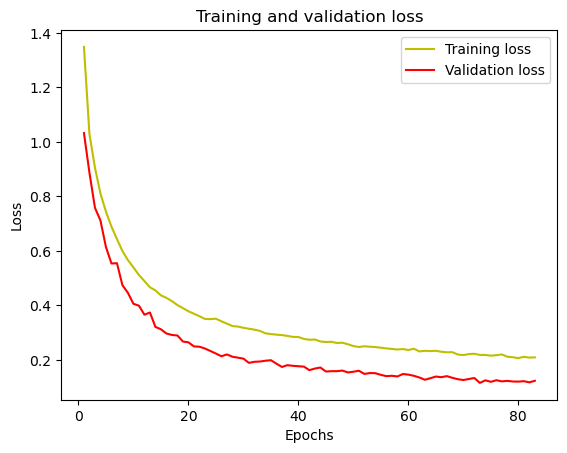

In [32]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss')
plt.show()

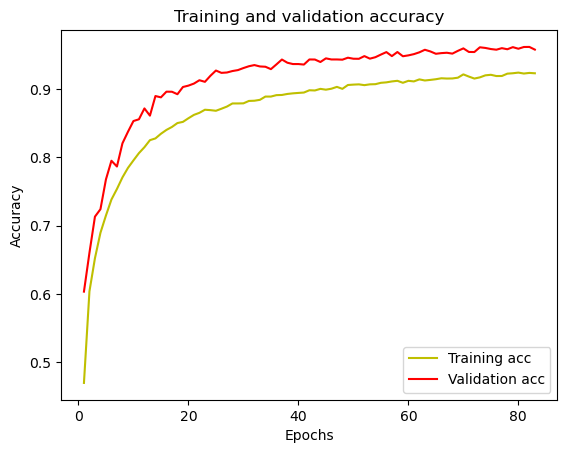

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 

294/294 [==============================] - 4s 12ms/step


In [36]:
#Print confusion matrix
cm = confusion_matrix(Y_test, y_pred_classes)


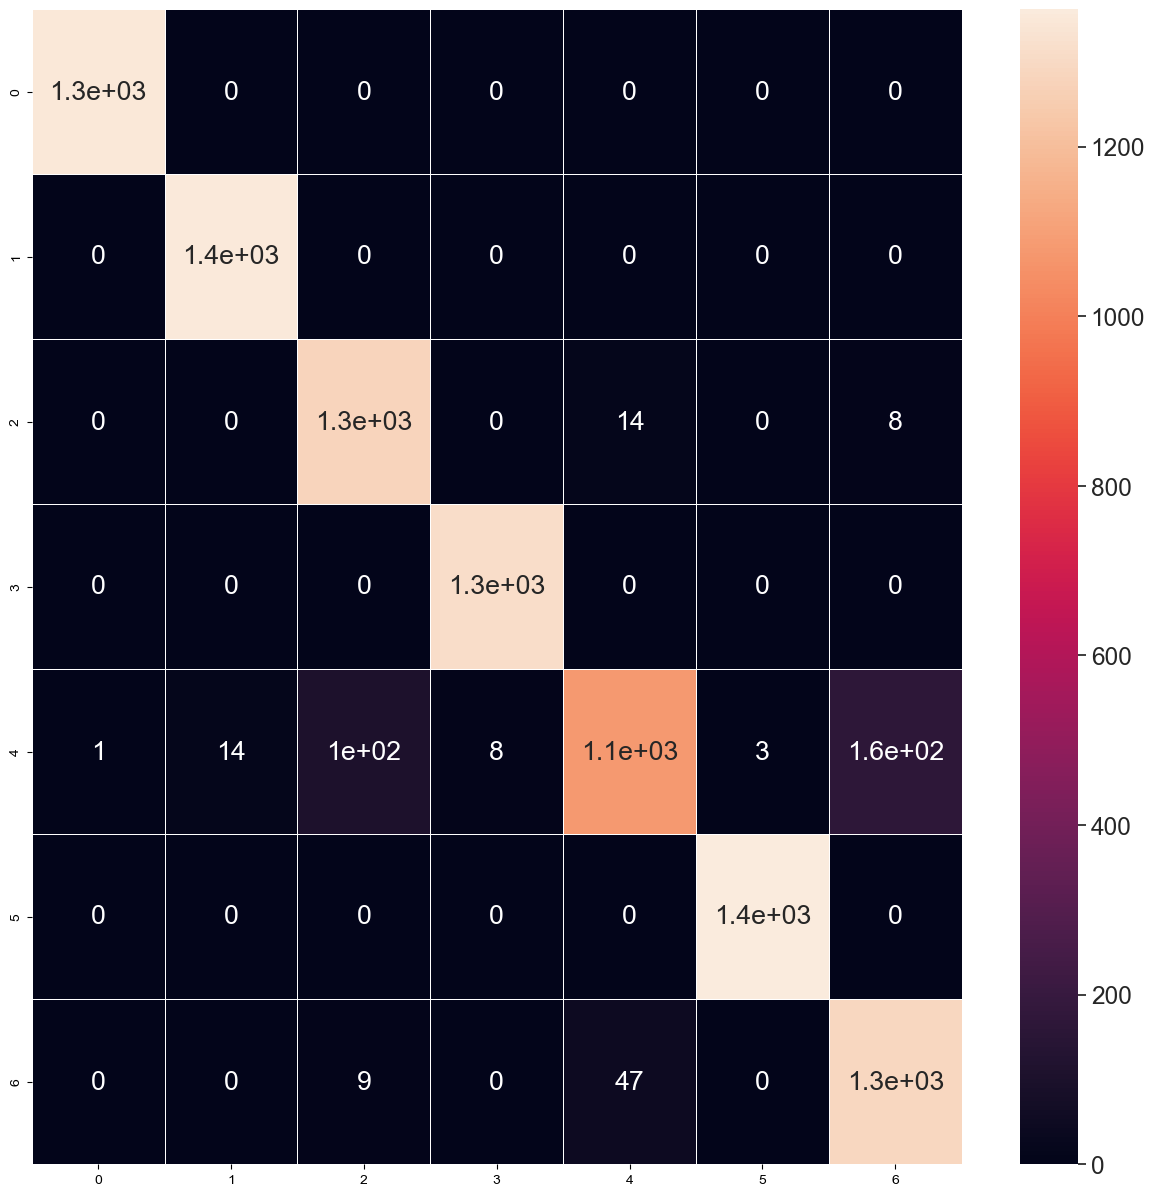

In [37]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
plt.savefig('confusion')